# Data preprocessing

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train_values.csv')
df_train_lb = pd.read_csv('train_labels.csv')
df_test = pd.read_csv('test_values.csv')

In [3]:
df_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Target variable is damage_grade
df_train_lb.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
df_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df_train.set_index('building_id').join(df_train_lb.set_index('building_id'))

In [7]:
df.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [8]:
df.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.shape

(260601, 39)

In [15]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [16]:
column_list = df.columns
binary = []

for col in column_list:
    if len(df[col].unique()) == 2:
        binary.append(col)

In [20]:
print('Binary column count: ',len(binary))
binary

Binary column count:  22


['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [24]:
other_col = []
for col in column_list:
    other_col.append(col)

In [26]:
for col in binary:
    other_col.remove(col)

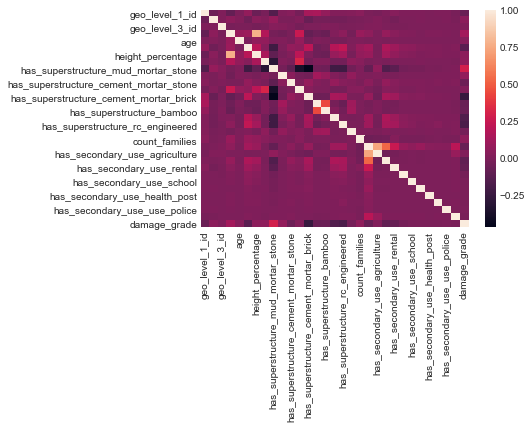

In [12]:
sns.heatmap(df.corr())

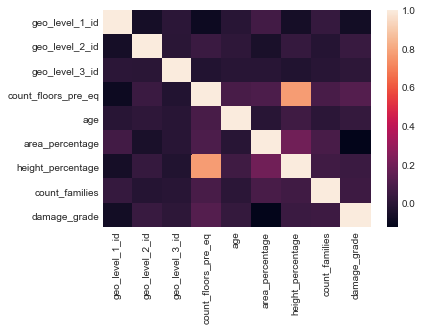

In [28]:
sns.heatmap(df[other_col].corr())

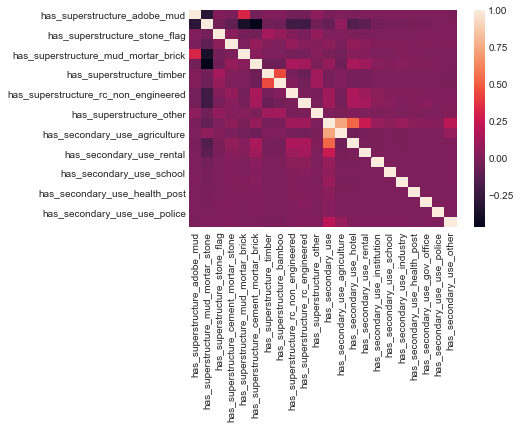

In [29]:
sns.heatmap(df[binary].corr())

In [30]:
df[binary].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 22 columns):
has_superstructure_adobe_mud              260601 non-null int64
has_superstructure_mud_mortar_stone       260601 non-null int64
has_superstructure_stone_flag             260601 non-null int64
has_superstructure_cement_mortar_stone    260601 non-null int64
has_superstructure_mud_mortar_brick       260601 non-null int64
has_superstructure_cement_mortar_brick    260601 non-null int64
has_superstructure_timber                 260601 non-null int64
has_superstructure_bamboo                 260601 non-null int64
has_superstructure_rc_non_engineered      260601 non-null int64
has_superstructure_rc_engineered          260601 non-null int64
has_superstructure_other                  260601 non-null int64
has_secondary_use                         260601 non-null int64
has_secondary_use_agriculture             260601 non-null int64
has_secondary_use_hotel                   260601 non

In [31]:
df[other_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 17 columns):
geo_level_1_id            260601 non-null int64
geo_level_2_id            260601 non-null int64
geo_level_3_id            260601 non-null int64
count_floors_pre_eq       260601 non-null int64
age                       260601 non-null int64
area_percentage           260601 non-null int64
height_percentage         260601 non-null int64
land_surface_condition    260601 non-null object
foundation_type           260601 non-null object
roof_type                 260601 non-null object
ground_floor_type         260601 non-null object
other_floor_type          260601 non-null object
position                  260601 non-null object
plan_configuration        260601 non-null object
legal_ownership_status    260601 non-null object
count_families            260601 non-null int64
damage_grade              260601 non-null int64
dtypes: int64(9), object(8)
memory usage: 45.8+ MB


In [44]:
object_col = []

for col in other_col:
    if df.dtypes[col] == np.object:
        object_col.append(col)

In [45]:
object_col

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [48]:
for col in object_col:
    print(col,'unique value count :', len(df[col].unique()))

land_surface_condition unique value count : 3
foundation_type unique value count : 5
roof_type unique value count : 3
ground_floor_type unique value count : 5
other_floor_type unique value count : 4
position unique value count : 4
plan_configuration unique value count : 10
legal_ownership_status unique value count : 4


## Create dummy variables for object data type (Training)

In [51]:
dummy_variable = pd.get_dummies(df[object_col], drop_first=True)

In [52]:
dummy_variable.head()

,land_surface_condition_o,land_surface_condition_t,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_q,roof_type_x,ground_floor_type_m,ground_floor_type_v,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28830,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
94947,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
590882,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
201944,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
df.drop(columns=object_col, inplace=True)

In [57]:
df = pd.concat([df, dummy_variable], axis=1)

In [58]:
df.shape

(260601, 61)

In [59]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Create dummy variables for object data type (Test)
This is for later submission

In [77]:
df_test_cp = df_test.copy()

In [78]:
df_test_cp.shape

(86868, 39)

In [79]:
dummy_variable = pd.get_dummies(df_test_cp[object_col], drop_first=True)
df_test_cp.drop(columns=object_col, inplace=True)
df_test_cp = pd.concat([df_test_cp, dummy_variable], axis=1)

In [80]:
df.shape

(260601, 61)

In [81]:
df_test_cp.shape

(86868, 61)

In [83]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
df_test_cp.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0


## Save train and test dataset

In [85]:
df.to_csv('train_ready.csv')
df_test_cp.to_csv('test_ready.csv', index = False)